In [111]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

### What types of properties are most popular on airbnb?

In [180]:
listing_df = pd.read_csv('listings.csv')
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [14]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [15]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [182]:
# convert price
listing_df['price'] = listing_df['price'].apply(lambda x: float(x[1:].replace(',','')))
listing_df['host_response_rate'] = listing_df['host_response_rate'].apply(lambda x: float(x[:-1]) if x==x else np.nan)
listing_df['host_acceptance_rate'] = listing_df['host_acceptance_rate'].apply(lambda x: float(x[:-1]) if x==x else np.nan)
listing_df['cleaning_fee'] = listing_df['cleaning_fee'].apply(lambda x: float(x[1:].replace(',','')) if x==x else np.nan)
listing_df['extra_people'] = listing_df['extra_people'].apply(lambda x: float(x[1:].replace(',','')) if x==x else np.nan)
listing_df['security_deposit'] = listing_df['security_deposit'].apply(lambda x: float(x[1:].replace(',','')) if x==x else np.nan)


In [183]:
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listing_df = listing_df[listing_df.bathrooms >0]
listing_df = listing_df[listing_df.bedrooms > 0]
listing_df = listing_df[listing_df.beds > 0]
listing_df = listing_df[listing_df.price > 0]
listing_df = listing_df[listing_df.number_of_reviews > 0]
listing_df = listing_df[listing_df.review_scores_rating > 0]
listing_df = listing_df[listing_df.reviews_per_month > 0]
listing_df = listing_df[listing_df.accommodates  > 0]

In [136]:
listing_df_num = listing_df[['price','host_response_rate', 'host_acceptance_rate',\
                            'square_feet','cleaning_fee','extra_people','minimum_nights',\
                            'maximum_nights','availability_30','availability_60','availability_90','availability_365',\
                            'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
                            'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',\
                            'reviews_per_month','security_deposit']]
listing_df_cat = listing_df[['price', 'property_type','room_type','bed_type','cancellation_policy',\
                            'bedrooms','accommodates','beds','bathrooms','guests_included', 'neighbourhood_cleansed']]


#### Numerical variables

In [122]:
corr = pd.DataFrame(listing_df_num.corr())
corr.reindex(corr.price.abs().sort_values(ascending=False).index)[['price']]

,price
price,1.000000
cleaning_fee,0.622521
square_feet,0.457616
security_deposit,0.293473
review_scores_location,0.201108
availability_30,0.183966
host_acceptance_rate,-0.180395
availability_60,0.166866
reviews_per_month,-0.162119
availability_90,0.149998


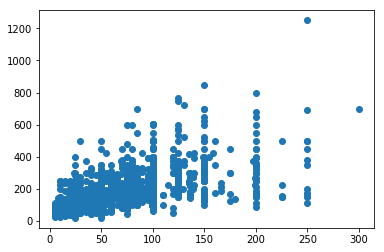

In [118]:
plt.scatter(x=listing_df_num['cleaning_fee'], y=listing_df_num['price'])

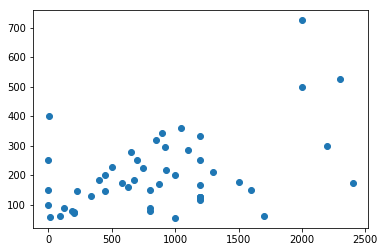

In [125]:
plt.scatter(x=listing_df_num['square_feet'], y=listing_df_num['price'])

#### Categorical variables

In [129]:
# property_type
property_type = listing_df_cat.groupby('property_type').price.mean()
property_type = property_type.reset_index()
property_type = property_type.sort_values('price',ascending=[0])
property_type

,property_type,price
6,Guesthouse,289.000000
2,Boat,277.363636
8,Loft,204.814815
3,Condominium,191.538462
0,Apartment,175.541190
9,Other,160.250000
10,Townhouse,154.500000
11,Villa,140.000000
7,House,134.259657
1,Bed & Breakfast,114.392857


Text(0,0.5,'price')

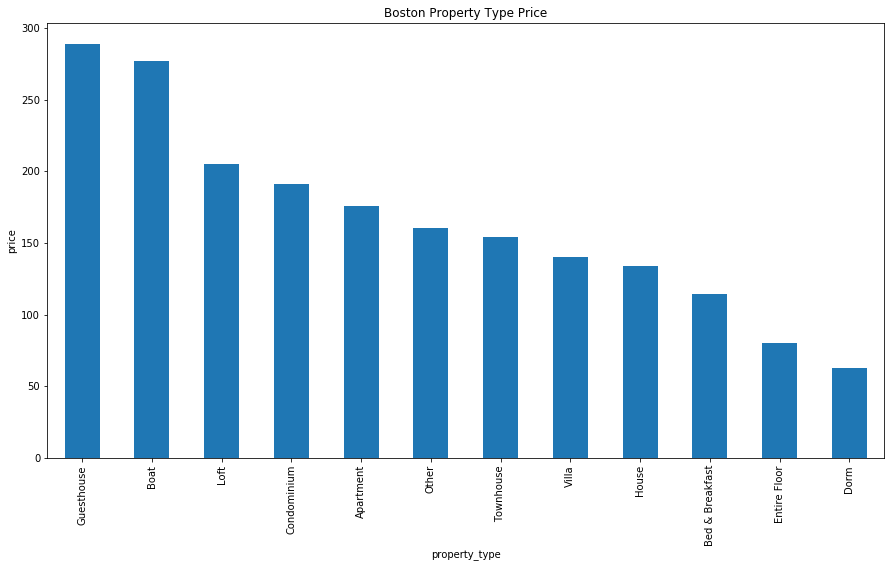

In [138]:
property_type.plot(kind='bar', 
           x='property_type',
           y='price',
           figsize =(15,8), 
           title = 'Boston Property Type Price', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('price')

In [130]:
# room type
room_type = listing_df_cat.groupby('room_type').price.mean()
room_type = room_type.reset_index()
room_type = room_type.sort_values('price',ascending=False)
room_type

,room_type,price
0,Entire home/apt,232.322326
1,Private room,89.505184
2,Shared room,69.903846


Text(0,0.5,'price')

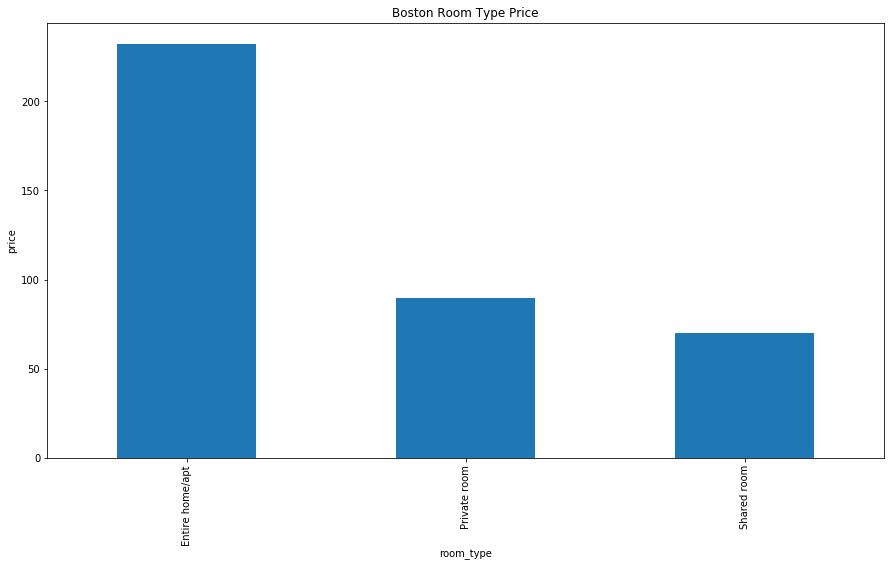

In [139]:
room_type.plot(kind='bar', 
           x='room_type',
           y='price',
           figsize =(15,8), 
           title = 'Boston Room Type Price', 
           legend = False)
plt.ylabel('room type')
plt.ylabel('price')

In [131]:
property_room_type = listing_df_cat.groupby(['property_type','room_type']).price.mean()
property_room_type = property_room_type.reset_index()
property_room_type = property_room_type.sort_values('price',ascending=False)
property_room_type.head()

,property_type,room_type,price
21,Townhouse,Entire home/apt,320.800000
12,Guesthouse,Entire home/apt,289.000000
6,Boat,Private room,287.000000
13,House,Entire home/apt,286.809917
5,Boat,Entire home/apt,275.222222


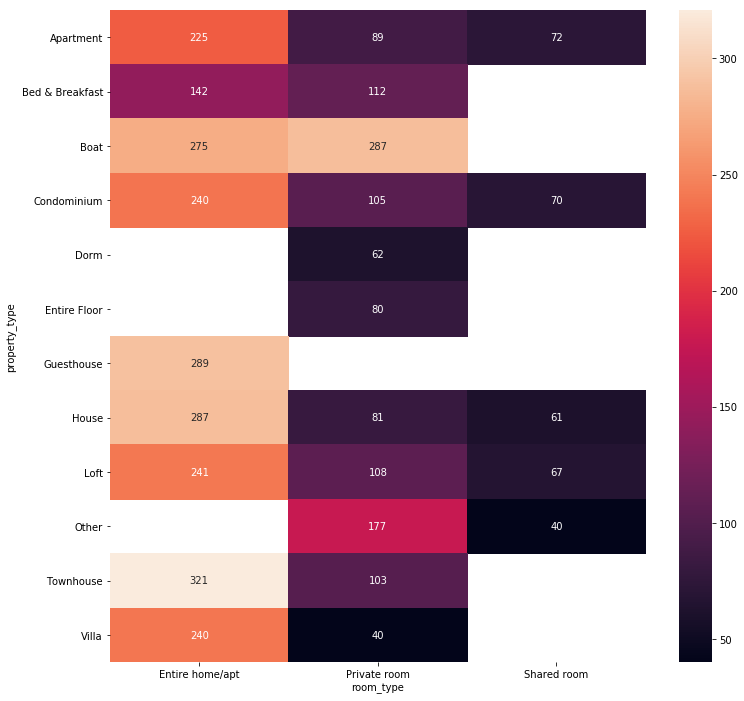

In [132]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(listing_df_cat.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

### What time of the year has the highest rental prices?

In [208]:
cal_df = pd.read_csv('calendar.csv')
cal_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [209]:
cal_df.fillna(0, inplace=True)
cal_df = cal_df[cal_df.price != 0]
cal_df['price'] = cal_df['price'].apply(lambda x: float(x[1:].replace(',','')))
cal_df = cal_df[cal_df.price >= 0]

In [210]:
cal_df['Year'],cal_df['Month'],cal_df['Day'] = cal_df['date'].str.split('-').str

In [211]:
year_df = cal_df.groupby(['Year','Month']).price.mean()
year_df = year_df.reset_index()
year_df = year_df.rename(columns={'price':'Average_Price'})
year_df['Year-Month'] = year_df['Year'].map(str) + "-" + year_df['Month'].map(str)

In [153]:
year_df

,Year,Month,Average_Price,Year-Month
0,2016,09,252.677308,2016-09
1,2016,10,233.416248,2016-10
2,2016,11,202.924416,2016-11
3,2016,12,192.601915,2016-12
4,2017,01,182.799671,2017-01
5,2017,02,180.961028,2017-02
6,2017,03,181.818742,2017-03
7,2017,04,197.252890,2017-04
8,2017,05,193.712295,2017-05
9,2017,06,196.535302,2017-06


Text(0,0.5,'Average Price')

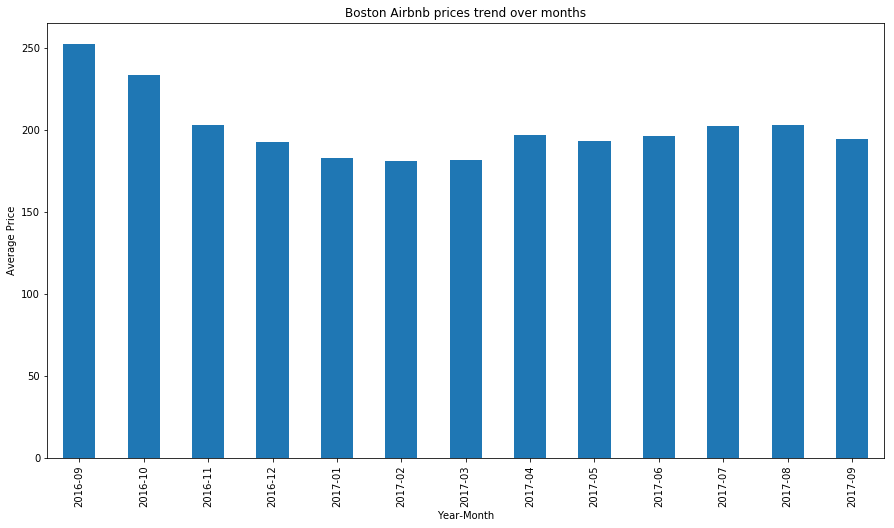

In [212]:
year_df.plot(kind='bar',
           x='Year-Month',
           y='Average_Price',
           figsize =(15,8), 
           title = 'Boston Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')

### How can reviews affect prices?

In [177]:
review_df = pd.read_csv('reviews.csv')
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [178]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jackiezhang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [179]:
review_df = review_df.dropna()
review_df['neg']=0.0
review_df['pos']=0.0
review_df['neu']=0.0
review_df['compound']=0.0
for index,row in review_df.iterrows():
    ss = sid.polarity_scores(row['comments'])
    review_df.set_value(index,'neg',ss['neg'])
    review_df.set_value(index,'pos',ss['pos'])
    review_df.set_value(index,'neu',ss['neu'])
    review_df.set_value(index,'compound',ss['compound'])
review_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


,listing_id,id,date,reviewer_id,reviewer_name,comments,neg,pos,neu,compound
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.0,0.352,0.648,0.9626
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.0,0.361,0.639,0.9061
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.0,0.233,0.767,0.9663
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.0,0.327,0.673,0.9267
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.0,0.363,0.637,0.8658


In [188]:
review_df = review_df.merge(listing_df[['id', 'price']], left_on='listing_id', right_on='id')
review_df.drop(columns=['id_x', 'id_y'], inplace=True)

In [226]:
polar_df = review_df[['pos']]
polar_df = polar_df.groupby(pd.cut(polar_df["pos"], np.arange(0, 1.1, 0.1))).count()
polar_df = polar_df.rename(columns={'pos':'count_of_Comments'})
polar_df = polar_df.reset_index()
polar_df = polar_df.rename(columns={'pos':'range_i'})
for i,r in polar_df.iterrows():
    polar_df.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polar_df.set_value(i,'Sentiment','positive')
del polar_df['range_i']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [227]:
polar_neg_df = review_df[['neg']]
polar_neg_df = polar_neg_df.groupby(pd.cut(polar_neg_df["neg"], np.arange(0, 1.1, 0.1))).count()
polar_neg_df = polar_neg_df.rename(columns={'neg':'count_of_Comments'})
polar_neg_df = polar_neg_df.reset_index()
polar_neg_df = polar_neg_df.rename(columns={'neg':'range_i'})
for i,r in polar_neg_df.iterrows():
    polar_neg_df.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polar_neg_df.set_value(i,'Sentiment','negative')
del polar_neg_df['range_i']
for i,r in polar_neg_df.iterrows():
    polar_df = polar_df.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [228]:
polar_neu_df = review_df[['neu']]
polar_neu_df = polar_neu_df.groupby(pd.cut(polar_neu_df["neu"], np.arange(0, 1.1, 0.1))).count()
polar_neu_df = polar_neu_df.rename(columns={'neu':'count_of_Comments'})
polar_neu_df = polar_neu_df.reset_index()
polar_neu_df = polar_neu_df.rename(columns={'neu':'range_i'})
for i,r in polar_neu_df.iterrows():
    polar_neu_df.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polar_neu_df.set_value(i,'Sentiment','neutral')
del polar_neu_df['range_i']
for i,r in polar_neu_df.iterrows():
    polar_df = polar_df.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

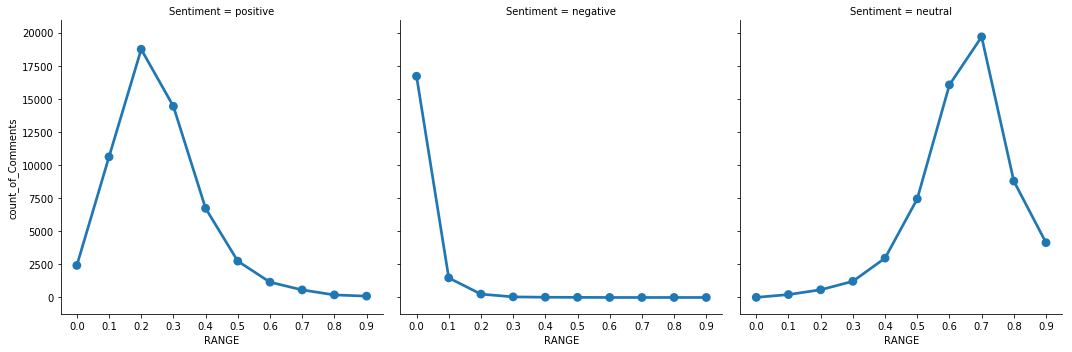

In [230]:
plt.figure(figsize=(10,10))
sns.factorplot(data=polar_df, x="RANGE", y="count_of_Comments",col="Sentiment")

In [231]:
review_price_df = review_df.groupby(['price'])['neg', 'pos', 'neu'].mean().reset_index()

In [232]:
review_price_df

,price,neg,pos,neu
0,11.0,0.016750,0.264083,0.719167
1,20.0,0.000000,0.222000,0.778000
2,22.0,0.009333,0.405333,0.585000
3,25.0,0.053500,0.218750,0.727750
4,28.0,0.089750,0.240938,0.669187
5,29.0,0.011667,0.283167,0.705167
6,30.0,0.071077,0.167538,0.684462
7,31.0,0.013364,0.365818,0.621000
8,32.0,0.016400,0.338400,0.645000
9,33.0,0.015882,0.306294,0.677765


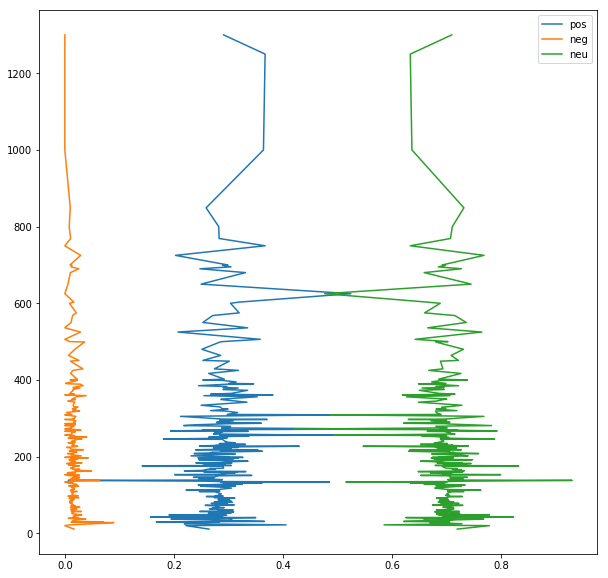

In [237]:
plt.figure(figsize=(10,10))
plt.plot(review_price_df['pos'], review_price_df['price'])
plt.plot(review_price_df['neg'], review_price_df['price'])
plt.plot(review_price_df['neu'], review_price_df['price'])
plt.legend(['pos', 'neg', 'neu'])